In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import networkx as nx

In [2]:
routes = pd.read_csv('data/routes.dat', sep=',', encoding='utf-8')
routes.columns = ['Airline','AirlineID','SourceAirport','SourceAirportID','DestinationAirport','DestinationAirportID','Codeshare','Stops','Equipment']
routes.head()

,Airline,AirlineID,SourceAirport,SourceAirportID,DestinationAirport,DestinationAirportID,Codeshare,Stops,Equipment
0,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
2,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
3,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
4,2B,410,DME,4029,KZN,2990,NaN,0,CR2


In [3]:
routes.Airline.describe()

count     67662
unique      568
top          FR
freq       2484
Name: Airline, dtype: object

In [4]:
routes.Airline.unique()

array(['2B', '2G', '2I', '2J', '2K', '2L', '2N', '2O', '2P', '2Z', '3E',
       '3F', '3G', '3H', '3J', '3K', '3L', '3M', '3O', '3P', '3R', '3S',
       '3U', '4B', '4D', '4E', '4G', '4H', '4K', '4M', '4N', '4O', '4Q',
       '4T', '4U', '4W', '4Y', '5C', '5G', '5H', '5J', '5M', '5N', '5P',
       '5Q', '5T', '5U', '5Z', '6E', '6H', '6I', '6L', '6R', '6T', '6W',
       '6Y', '7C', '7E', '7F', '7G', '7H', '7I', '7J', '7M', '7P', '7R',
       '7S', '8B', '8D', '8E', '8I', '8L', '8M', '8P', '8Q', '8R', '8T',
       '8U', '8V', '9C', '9D', '9E', '9K', '9M', '9N', '9Q', '9R', '9U',
       '9V', '9W', 'A2', 'A3', 'A4', 'A5', 'A8', 'A9', 'AA', 'AB', 'ABJ',
       'AC', 'AD', 'AE', 'AF', 'AH', 'AI', 'AK', 'AM', 'AP', 'AR', 'AS',
       'AT', 'AV', 'AW', 'AY', 'AZ', 'B2', 'B5', 'B6', 'B7', 'B9', 'BA',
       'BB', 'BC', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BK', 'BL', 'BM',
       'BP', 'BR', 'BT', 'BU', 'BV', 'BW', 'BX', 'C8', 'CA', 'CC', 'CE',
       'CG', 'CI', 'CM', 'CN', 'CU', 'CX', 'CY', '

In [5]:
airlines = pd.read_csv('data/airlines.dat', sep=',', encoding='utf-8')
airlines.columns = ['Airline ID', 'Name', 'Alias',  'IATA', 'ICAO','Callsign','Country','Active']
airlines.head()

,Airline ID,Name,Alias,IATA,ICAO,Callsign,Country,Active
0,1,Private flight,\N,-,NaN,NaN,NaN,Y
1,2,135 Airways,\N,NaN,GNL,GENERAL,United States,N
2,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
3,4,2 Sqn No 1 Elementary Flying Training School,\N,NaN,WYT,NaN,United Kingdom,N
4,5,213 Flight Unit,\N,NaN,TFU,NaN,Russia,N


In [6]:
airlines.Name.nunique()

6072

In [7]:
airports = pd.read_csv('data/airports.dat', sep=',', encoding='utf-8')
airports.columns = ['Airport ID', 'Name', 'City', 'Country',  'IATA', 'ICAO','Latitude','Longitude','Altitude', 'Timezone','DST', 'Tz database time zone', 'Type', 'Source']
airports.head()

,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
0,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
1,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
2,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
3,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports
4,6,Wewak International Airport,Wewak,Papua New Guinea,WWK,AYWK,-3.583830,143.669006,19,10,U,Pacific/Port_Moresby,airport,OurAirports


In [8]:
alliances = pd.read_csv('data/alliances.dat', sep=',', encoding='utf-8')
print('number of airlines in an alliance: ', alliances.Airline.nunique())
print('Number of airlines per Alliance: ', alliances.groupby(['Alliance']).count())
alliances.head()

number of airlines in an alliance:  60
Number of airlines per Alliance:                 Airline
Alliance              
One World           14
SkyTeam             20
Star Alliance       26


,Alliance,Airline
0,Star Alliance,Adria Airways
1,Star Alliance,Aegean Airlines
2,Star Alliance,Air Canada
3,Star Alliance,Air China
4,Star Alliance,Air New Zealand


In [9]:
airl_alliances_all  = pd.merge(alliances, airlines, left_on='Airline', right_on='Name', how = 'left')
print('number of airlines with alliance: ', airl_alliances_all.Airline.nunique())
airl_alliances_all.head()

number of airlines with alliance:  60


,Alliance,Airline,Airline ID,Name,Alias,IATA,ICAO,Callsign,Country,Active
0,Star Alliance,Adria Airways,83,Adria Airways,\N,JP,ADR,ADRIA,Slovenia,Y
1,Star Alliance,Aegean Airlines,96,Aegean Airlines,\N,A3,AEE,AEGEAN,Greece,Y
2,Star Alliance,Air Canada,330,Air Canada,\N,AC,ACA,AIR CANADA,Canada,Y
3,Star Alliance,Air China,751,Air China,\N,CA,CCA,AIR CHINA,China,Y
4,Star Alliance,Air New Zealand,345,Air New Zealand,\N,NZ,ANZ,NEW ZEALAND,New Zealand,Y


In [10]:
# retain useful columns
airl_alliances = airl_alliances_all[['Alliance', 'Name', 'IATA', 'Country']].copy()

In [11]:
# merge to the route dataframe
routes_alce = pd.merge(routes, airl_alliances, left_on = 'Airline', right_on = 'IATA', how = 'left')
print('Number of edges before the merge and after: ', routes.Airline.count(), routes_alce.Airline.count())

Number of edges before the merge and after:  67662 67662


In [12]:
print('Number of alliances-airlines found in the route data: ', routes_alce[~routes_alce.IATA.isnull()].IATA.nunique())
print('Number of flights (edges) flown by alliances-airlines: ', routes_alce[~routes_alce.IATA.isnull()].Airline.count())

Number of alliances-airlines found in the route data:  60
Number of flights (edges) flown by alliances-airlines:  29349


In [13]:
# only alliances airlines
routes_alce_only = routes_alce[~routes_alce.IATA.isnull()]
routes_alce_only.head()

,Airline,AirlineID,SourceAirport,SourceAirportID,DestinationAirport,DestinationAirportID,Codeshare,Stops,Equipment,Alliance,Name,IATA,Country
4237,A3,96,AOK,1459,ATH,3941,NaN,0,DH4,Star Alliance,Aegean Airlines,A3,Greece
4238,A3,96,AOK,1459,KSJ,1461,NaN,0,DH8,Star Alliance,Aegean Airlines,A3,Greece
4239,A3,96,AOK,1459,RHO,1472,NaN,0,DH8,Star Alliance,Aegean Airlines,A3,Greece
4240,A3,96,ARN,737,KLX,1456,NaN,0,319,Star Alliance,Aegean Airlines,A3,Greece
4241,A3,96,ARN,737,SKG,1486,Y,0,736,Star Alliance,Aegean Airlines,A3,Greece


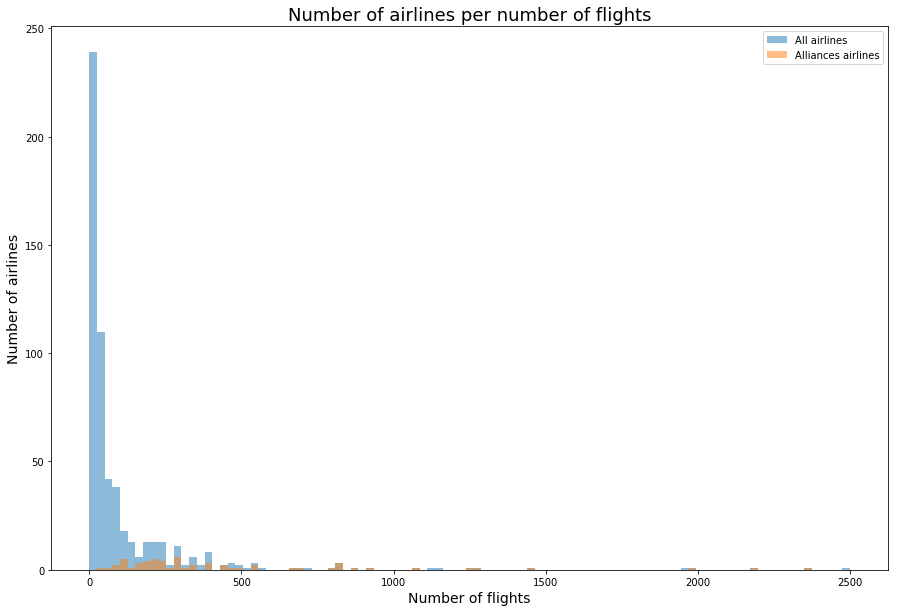

In [14]:
bins = np.linspace(0, 2500, 100)
plt.figure(figsize=(15,10))
plt.hist(routes_alce[['Airline']].groupby('Airline').size(), bins, alpha=0.5, label='All airlines')
plt.hist(routes_alce_only[['Airline']].groupby('Airline').size(), bins, alpha=0.5, label='Alliances airlines')
plt.legend(loc='upper right')
plt.title('Number of airlines per number of flights', fontsize = 18)
plt.ylabel('Number of airlines', fontsize = 14)
plt.xlabel('Number of flights', fontsize= 14)
plt.savefig('Histogram_flights_airlines.pdf')
plt.show()


In [15]:
df = routes_alce[['Airline', 'Alliance', 'Name']].groupby(['Airline', 'Alliance', 'Name']).size().reset_index(name='counts')

In [16]:
df.head()

,Airline,Alliance,Name,counts
0,A3,Star Alliance,Aegean Airlines,222
1,AA,One World,American Airlines,2354
2,AB,One World,Air Berlin,798
3,AC,Star Alliance,Air Canada,705
4,AF,SkyTeam,Air France,1071


In [17]:
# annotation alliances
df[df.counts>1000]

,Airline,Alliance,Name,counts
1,AA,One World,American Airlines,2354
4,AF,SkyTeam,Air France,1071
12,CA,Star Alliance,Air China,1260
16,CZ,SkyTeam,China Southern Airlines,1454
17,DL,SkyTeam,Delta Air Lines,1981
34,MU,SkyTeam,China Eastern Airlines,1263
55,UA,Star Alliance,United Airlines,2180


In [18]:
# annotation
routes_nonall = routes_alce[routes_alce.IATA.isnull()]
df_nonall = routes_nonall[['Airline']].groupby('Airline').size().reset_index(name='counts')
df_nonall[df_nonall.counts>1000]

,Airline,counts
180,FR,2484
421,U2,1130
433,US,1960
463,WN,1146


Creation of the weighted adjacency matrix. We first create a 3D tensor with dimensions {source, destination, alliance}. That way we can keep the weight intact for each flight.
* No edges = 0
* No alliances = 1
* Star Alliance = 2
* One World = 3
* SkyTeam = 4

In [19]:
# 3D - adjacency matrix
routes_alce = routes_alce.fillna("None")
routes_alce.head(2)
# import of source and destination airport
source_airports = routes[['SourceAirport']]
source_airports = source_airports.rename(columns={'SourceAirport':'Airport'})

dest_airports = routes[['DestinationAirport']]
dest_airports = dest_airports.rename(columns={'DestinationAirport':'Airport'})

# creation of a dataframe with all airport and airport_idx 
# (we use airport_idx insteed of airportID because some airports have no airportID)
airportsID = pd.concat([source_airports,dest_airports]).drop_duplicates().reset_index().drop(columns=['index']).reset_index()
airportsID = airportsID.set_index('Airport').rename(columns={'index':'airportsID'})

alliances_idx = {"None":1, "Star Alliance":2, "One World":3, "SkyTeam":4}

n_nodes = len(airportsID)
adjacency = np.zeros((n_nodes, n_nodes, 5), dtype=int)
for idx,row in routes_alce.iterrows():
    
    idx_source = airportsID.loc[row.SourceAirport, "airportsID"]
    idx_dest = airportsID.loc[row.DestinationAirport, "airportsID"]
    category = alliances_idx[row.Alliance]
    
    adjacency[idx_source, idx_dest, category] += 1
    adjacency[idx_dest, idx_source, category] += 1

In [20]:
adjacency[:10, :10, 1]

array([[0, 0, 2, 0, 0, 0, 2, 2, 2, 0],
       [0, 0, 2, 0, 0, 0, 2, 0, 0, 0],
       [2, 2, 0, 6, 2, 4, 6, 6, 4, 2],
       [0, 0, 6, 0, 0, 2, 2, 2, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 2, 2, 2],
       [0, 0, 4, 2, 0, 0, 0, 0, 0, 0],
       [2, 2, 6, 2, 0, 0, 0, 4, 0, 0],
       [2, 0, 6, 2, 2, 0, 4, 0, 0, 2],
       [2, 0, 4, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 2, 0, 0, 2, 0, 0]])

# How prevalent are the alliances in the global flight route network?

For each alliance i, label the airports served by an alliance i flight, and compare the density of the alliance i airport network to the whole network density (check if the alliance network is connected, and maybe there are interesting relations between the big component/small components and the alliances), and do this analysis 3 times. Then do the same analysis but for all the alliances together. This should allow us to see how many airports are not served by alliance airlines, and what is the proportion of airports that are served by one alliance compared to airports served by 2 or all the alliances.

**Some insights**

All the alliances networks only have one connected component


### Alliance Analysis

In [59]:
def network_analysis(A):
    '''Function that returns graph properties on the one connected component: average degree, 
    maximum and minimum degree, number of nodes, diameter of the graph and average clustering 
    coefficient of the largest connected component.
    A histogram of the degree distribution is also plotted.
    The analysis is done on the unweighted adjacency matrix.
    '''
    # number of flights (edges)
    print('Number of flights: ', np.sum(A)/2)
    #create an unweighted adjacency matrix
    A_nonw = np.copy(A)
    A_nonw[A_nonw!=0]=1 
    # adjacency matrix of only the alliance network
    A_trunc = A_nonw[~np.all(A_nonw == 0, axis=1)]
    A_largest = A_trunc[:, ~np.all(A_trunc == 0, axis=0)]
    G = nx.from_numpy_matrix(A_nonw)
    G_largest = max(nx.connected_component_subgraphs(G), key=len)
    
    # degree
    degree = np.sum(A_largest, axis=0) 
    print('\naverage degree = ', round(np.average(degree),2), '\nmaximum degree = ', max(degree), '\nminimum degree = ', min(degree))
    
    # nodes
    connect_comp = A_largest.shape[0]
    print('\nNumber of airports connected to the alliance network: ', connect_comp)
    
    # diameter an cluster coefficient
    print('\nDiameter of the graph: ', nx.diameter(G_largest), '\nAverage clustering coefficient: ', nx.average_clustering(G_largest))
    
    # plot the degree distribution
    weights = np.ones_like(degree) / float(n_nodes)
    plt.hist(degree, weights=weights, bins = 50);
    return

Number of flights:  67662.0

average degree =  11.24 
maximum degree =  248 
minimum degree =  1

Number of airports connected to the alliance network:  3425

Diameter of the graph:  13 
Average clustering coefficient:  0.48833620245296055


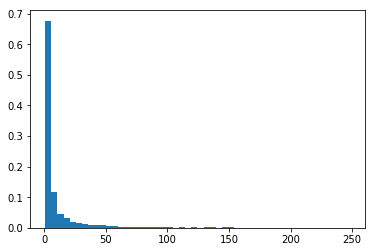

In [60]:
# Analysis on the normal adjacency matrix (as in Milestone 1)
adjacency_normal =  np.sum(adjacency, axis=2)
network_analysis(adjacency_normal) # the results are the same!!!

Number of flights:  11267.0

average degree =  7.18 
maximum degree =  226 
minimum degree =  1

Number of airports connected to the alliance network:  1221

Diameter of the graph:  9 
Average clustering coefficient:  0.47060521430020946


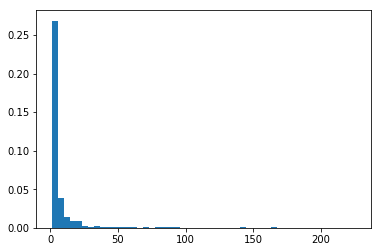

In [61]:
# Analysis on the Star Alliance network
adjacency_star =  adjacency[:,:, 2]
network_analysis(adjacency_star) 

Number of flights:  7288.0

average degree =  6.43 
maximum degree =  184 
minimum degree =  1

Number of airports connected to the alliance network:  953

Diameter of the graph:  9 
Average clustering coefficient:  0.4381413258767767


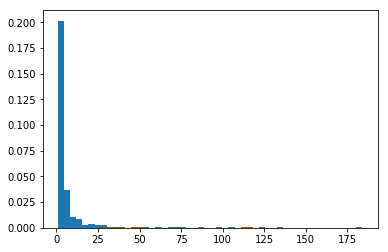

In [62]:
# Analysis on One World
adjacency_world =  adjacency[:,:, 3]
network_analysis(adjacency_world) 

Number of flights:  10794.0

average degree =  7.41 
maximum degree =  210 
minimum degree =  1

Number of airports connected to the alliance network:  1081

Diameter of the graph:  9 
Average clustering coefficient:  0.48923958526273087


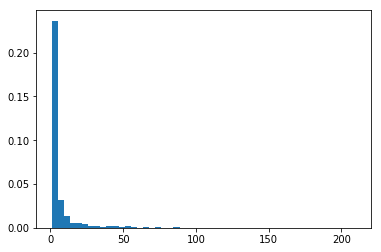

In [63]:
# Analysis on SkyTeam
adjacency_sky =  adjacency[:,:, 4]
network_analysis(adjacency_sky) 

Number of flights:  29349.0

average degree =  10.75 
maximum degree =  228 
minimum degree =  1

Number of airports connected to the alliance network:  1797

Diameter of the graph:  9 
Average clustering coefficient:  0.5317438109187125


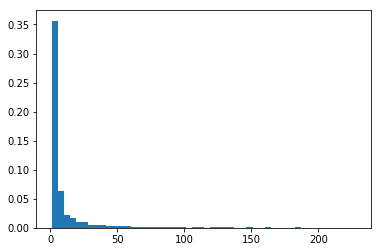

In [64]:
# Analysis on the whole alliance network
adjacency_alce = np.sum(adjacency[:,:, 2:], axis = 2)
network_analysis(adjacency_alce) 

Number of flights:  18555.0

average degree =  8.95 
maximum degree =  226 
minimum degree =  1

Number of airports connected to the alliance network:  1524

Diameter of the graph:  8 
Average clustering coefficient:  0.49030057620639556


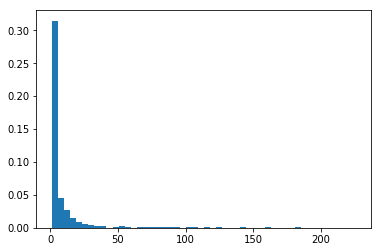

In [65]:
# pairwise networks
# Analysis on the star & one world network
adjacency_star_world = np.sum(adjacency[:,:, 2:4], axis = 2)
network_analysis(adjacency_star_world) 

Number of flights:  22061.0

average degree =  9.52 
maximum degree =  228 
minimum degree =  1

Number of airports connected to the alliance network:  1588

Diameter of the graph:  9 
Average clustering coefficient:  0.52148984228149


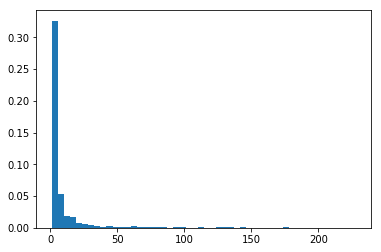

In [66]:
# Analysis on the star & skyteam network
adjacency_star_sky = np.sum(adjacency[:,:, [2,4]], axis = 2)
network_analysis(adjacency_star_sky)

Number of flights:  18082.0

average degree =  9.21 
maximum degree =  210 
minimum degree =  1

Number of airports connected to the alliance network:  1427

Diameter of the graph:  9 
Average clustering coefficient:  0.5019078464790793


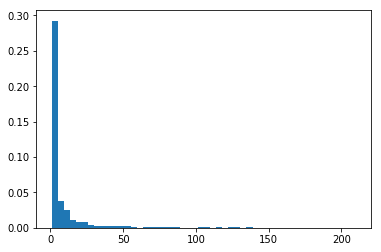

In [67]:
# Analysis on the world & skyteam network
adjacency_sky_world = np.sum(adjacency[:,:, 3:], axis = 2)
network_analysis(adjacency_sky_world)

## Resumé of the alliance analysis

The star alliance is the most prevalent among the three alliances. It serves the largest number of airports and has the most flights. The star alliance is followed by SkyTeam which serves a similar number of airports and has a similar number of flights. However, its network is more dense, shown by a slightly higher average degree (7.41 vs 7.18). One World is the smallest alliance with 7288 flights compared to 11267 and 10794 flights for the Star Alliance and SkyTeam, respectively. Its network is more sparsely connected (average degree = 6.43) and it has the lowest average clustering coefficient (One World: 0.44, Star Alliance: 0.47, SkyTeam: 0.49). 

The degree distribution in the global flight network follows a power law, and the network is characterized by the presence of a few very large hubs and a lot of nodes with only a few links. This behaviour is even more pronounced when we analyze the alliance-network alone. Even though the alliance network has less flights (29349 compared to 67662) and serves fewer airports (1797 compared to 3425), the largest hub has a degree very close to the degree of the whole network (228 compared to 248). The average degree is slightly lower (11.24 compared to 10.75), but the clustering coefficient is a little bit higher (0.53 compared to 0.49). As expected, the alliance network is more concentrated and it forms a single component, whereas the whole network had 8 components. In addition, the diameter of the alliance network equals 9 which shows that the alliance network is less spread out than the whole flight route network which has a diameter of 13. 


## Proportion of airports served by alliance-airlines

Define the number of airports served by either: SkyTeam, Star Alliance, One World, SkyTeam + One World, SkyTeam + Star Alliance, One World + Star Alliance, all, no alliance.



In [41]:
def airport_vector(A):
    '''Function that given an adjacency matrix returns a binary vector with the length of the airports (nodes). 
    1 means that the node has an edge, and 0 if not.'''
    v_airport = A.any(1).astype(int)
    return v_airport

In [42]:
# generate unweighted adjacency matrices for the four categories
airport_star = airport_vector(adjacency_star)
airport_world = airport_vector(adjacency_world)
airport_sky = airport_vector(adjacency_sky)
airport_noall = airport_vector(adjacency[:,:,1])

In [46]:
# generate the number of airports for the seven combinations
n_no_alliance = np.count_nonzero((airport_noall - airport_sky- airport_star - airport_world).clip(min=0))
n_sky = np.count_nonzero((airport_sky- airport_star - airport_world).clip(min=0))
n_star = np.count_nonzero((airport_star- airport_sky - airport_world).clip(min=0))
n_world = np.count_nonzero((airport_world- airport_star - airport_sky).clip(min=0))
n_sky_star = np.sum((airport_sky + airport_star - airport_world) == 2)
n_sky_world = np.sum((airport_sky - airport_star + airport_world) == 2)
n_world_star = np.sum((airport_world + airport_star - airport_sky) == 2)
n_all = np.sum((airport_sky + airport_star + airport_world) == 3)

Text(0,0.5,'Number of airports')

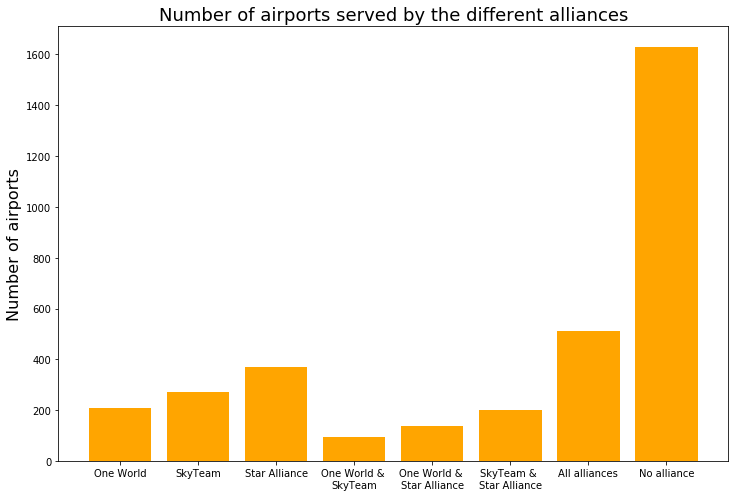

In [70]:
n_airports = [n_world, n_sky, n_star, n_sky_world, n_world_star, n_sky_star, n_all, n_no_alliance]
airport_label = ['One World', 'SkyTeam', 'Star Alliance', 'One World & \nSkyTeam', 
                 'One World & \nStar Alliance', 'SkyTeam & \nStar Alliance', 'All alliances', 'No alliance']
plt.figure(figsize=(12,8))
plt.bar(np.arange(1,9), n_airports, tick_label = airport_label, color = 'orange')
plt.title('Number of airports served by the different alliances', fontsize = 18)
plt.ylabel('Number of airports', fontsize =  16)

## maybe add the number on top of the bars?

## Analysis of the plot
Following the previous analysis, this plot shows again that most of the airports are not served by an airline belonging to one of the alliances. The majority of airports in the alliance network are only served by one alliance (852 airports in total). However, a lot of airports are also served by all the three alliances, and interestingly this number is significantly higher than the number of airports that are served by 2 alliances (432 compared to 513 airports). This distribution might hint a conflict of interest, in the sense that an alliance is not serving an airport which is already served by another alliance, but also the fact that big hubs are likely to be served by all the alliances, whereas small airports are only served by one alliance. In the following we will analyze whether this assumption holds.

# Q2 Is the alliance business a hub thing? 
- We label the airports by the number of alliances flights that serve it (0, 1, 2 or 3) and we analyze the correlation between this number and the degree of the airport. We expect that a lower degree airport is less likely to be connected to the alliance network than big hubs.

- Case study on big cities which have multiple airports (e.g. London, Paris, Rome): is there a trend that only a few airports are served by alliance airports? If yes, then how does the correlation from the previous point change if we substract "the big city non-alliance airports", to get a better insight of the geographic expansion (vs. airport expansion) of the alliance network (maybe sth. to consider on the previous question as well).

In [73]:
# create an airport vector with the number of alliances serving it
airport_num_all = airport_world + airport_sky + airport_star

In [69]:
np.sum(airport_num_all == 2), np.sum(airport_num_all == 3), np.sum(airport_num_all == 1)

(432, 513, 852)

In [78]:
# degree distribution

### of the whole network
# create the unweighted adjacency matrix 
A_nonw = np.copy(adjacency_normal)
A_nonw[A_nonw!=0]=1 
degree_all = np.sum(A_nonw, axis=0) 
### of the alliance's network
A_nonw = np.copy(np.sum(adjacency[:,:,2:], axis = 2))
A_nonw[A_nonw!=0]=1 
degree_alce = np.sum(A_nonw, axis=0) 

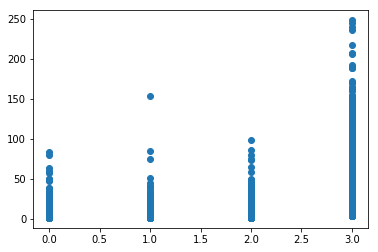

In [79]:
plt.scatter(airport_num_all, degree_all)

In [80]:
# To do: boxplots and statistical difference between them: but yes: big hubs = all three alliances

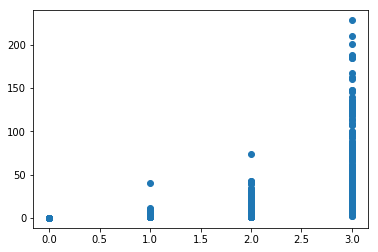

In [81]:
plt.scatter(airport_num_all, degree_alce)

In [ ]:
# Now the behaviour is very pronounced!!! 

In [25]:
# We may want to flatten this array. We can associate each travel (source, destination) with the 
# alliance that have the most flight on it
#MaXdjacency = np.argmax(adjacency[:,:, 2:], axis=2)
MaXdjacency = np.argmax(adjacency, axis=2)

In [26]:
airport_tag = np.zeros(airportsID.size, dtype = int)
for name,airport in airportsID.iterrows():
    counts = np.bincount(MaXdjacency[airport.airportsID, :])[1:]
    values = np.unique(MaXdjacency[airport.airportsID, :])
    values = list(range(values.min(), values.max()+1))[1:]
    maxi = np.argmax(counts)
    airport_tag[airport.airportsID] = values[maxi]